### Step 1: Import the Dataset

In [2]:
# Import all necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the diabetes dataset
diabetes = load_diabetes()

In [4]:
# Check for available description of the dataset
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
# Convert data to DataFrame
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target

In [6]:
# Display the first 5 rows of the dataset 
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [7]:
# Check feature names
print("Feature names:", diabetes.feature_names)

Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [8]:
# Take a look at the data structure
diabetes_df.shape

(442, 11)

The dataset contains 442 samples with 10 input features and 1 target variable.

In [10]:
# Check for data types and null values
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


### Step 2: Data Preprocessing

In [12]:
# Check for missing values in the dataset
diabetes_df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [13]:
# Check for duplicate records in the dataset
diabetes_df.duplicated().any()

False

In [14]:
# Split data into features and target
X = diabetes_df.drop('target', axis=1)
y = diabetes_df['target']

In [15]:
# Split the dataset into training and test sets (80%-20% split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Display the shapes of the resulting datasets
print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)

Training set shape: (353, 10)
Test set shape: (89, 10)


### Step 3: Model Training

In [19]:
# Initialize Linear Regression model
model = LinearRegression()

In [20]:
# Train the model using the training set
model.fit(X_train_scaled, y_train)

LinearRegression()

### Step 4: Model Prediction

In [22]:
# Predict the target values for the test set
y_pred = model.predict(X_test_scaled)

### Step 5: Model Evaluation

In [24]:
# Evaluate the model
# We will use Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-sqaured as evaluation metrics
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
    
# Print the evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 2900.19
Root Mean Squared Error: 53.85
R-squared: 0.45


The RMSE of 53.85 means that, on average, our predictions are off by about 53.85 units from the actual values. An R-squared score of 0.45 indicates that our model accounts for approximately 45% of the variance in the target variable, suggesting a moderate level of fit.

### Step 6: Visualization

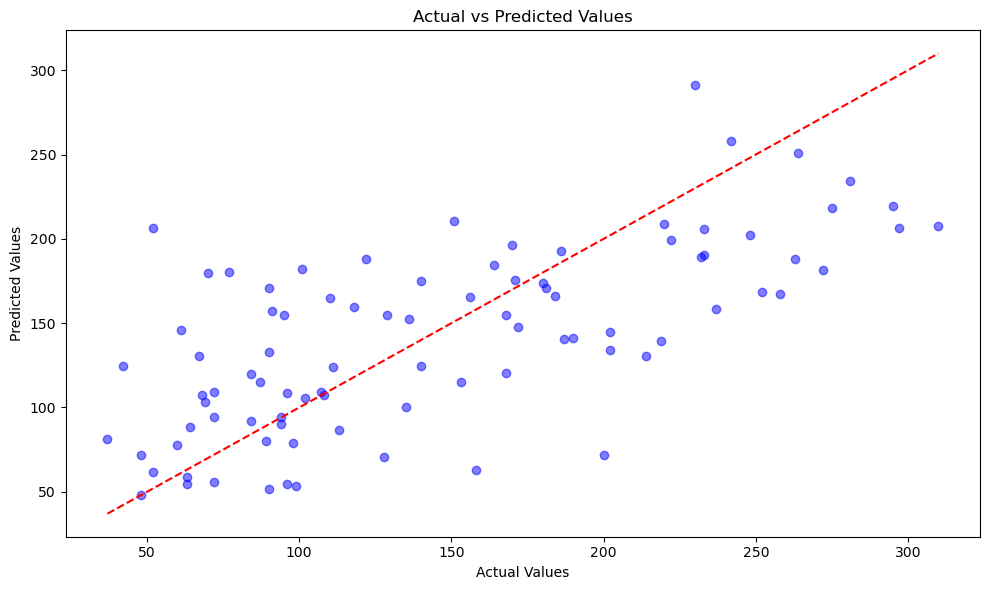

In [27]:
# Visualization 1: Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.tight_layout()
plt.show()

This scatter plot illustrates the actual versus predicted values. The red dashed line signifies perfect predictions, and points that are nearer to this line indicate more accurate predictions. Although there is a positive correlation between the actual and predicted values, the significant scatter suggests that the model’s predictions could still be improved.

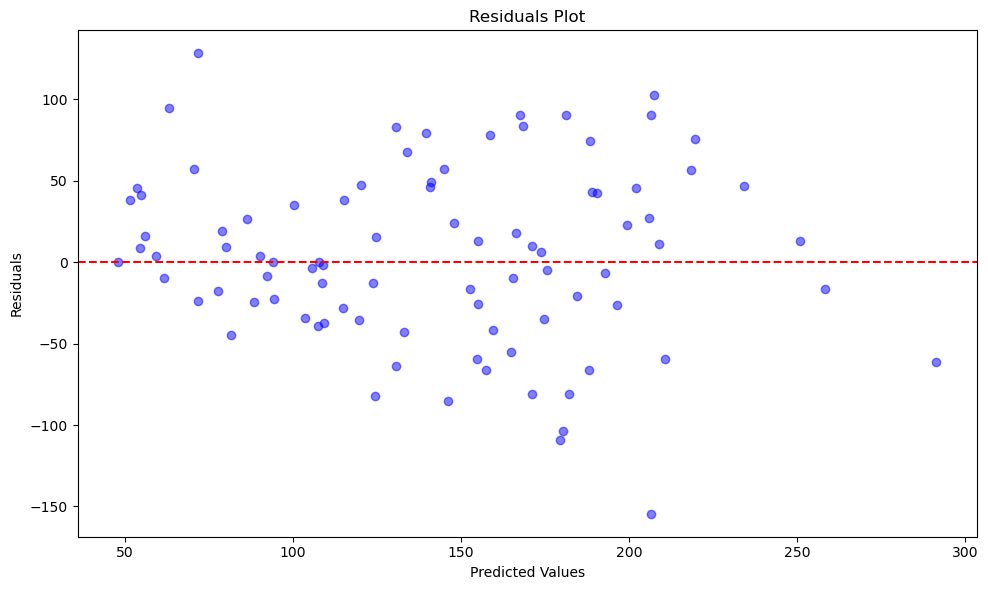

In [29]:
# Visualization 2: Plot residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.tight_layout()
plt.show()

This plot displays the residuals (the differences between actual and predicted values) against the predicted values. Ideally, we aim for a random scatter of points around the horizontal line at y=0. In this instance, we observe the following:

- The residuals are approximately symmetrically distributed around the horizontal line at y=0.
- There is no clear pattern in the residuals, which is a positive sign.
- However, there appears to be slightly greater variance in the residuals for higher predicted values, indicating that the model's performance may vary across the prediction range.

### Step 7: Feature Selection

In [32]:
# Feature Selection using RFE
rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)
rfe = rfe.fit(X_train_scaled, y_train)

In [33]:
# Get the selected features
selected_features = [diabetes.feature_names[i] for i in range(len(diabetes.feature_names)) if rfe.support_[i]]
print("Top 5 features selected by RFE:")
print(selected_features)

Top 5 features selected by RFE:
['bmi', 'bp', 's1', 's2', 's5']


In [34]:
# Re-run the model with selected features
X_train_selected = X_train_scaled[:, rfe.support_]
X_test_selected = X_test_scaled[:, rfe.support_]

In [35]:
model_selected = LinearRegression()
model_selected.fit(X_train_selected, y_train)

LinearRegression()

In [36]:
y_pred_selected = model_selected.predict(X_test_selected)

In [37]:
# Evaluate the new model
mse_selected = mean_squared_error(y_test, y_pred_selected)
rmse_selected = np.sqrt(mse_selected)
r2_selected = r2_score(y_test, y_pred_selected)

# Print the evaluation metrics for selected features
print("\
Model Evaluation with Selected Features:")
print(f"Root Mean Squared Error (RMSE): {rmse_selected:.2f}")
print(f"R-sqaured: {r2_selected:.2f}")

Model Evaluation with Selected Features:
Root Mean Squared Error (RMSE): 54.56
R-sqaured: 0.44


In [38]:
# Compare with original model
mse_original = mean_squared_error(y_test, y_pred)
rmse_original = np.sqrt(mse_original)
r2_original = r2_score(y_test, y_pred)

# Print the evaluation metrics for original features
print("\
Original Model Evaluation:")
print(f"Root Mean Squared Error (RMSE): {rmse_original:.2f}")
print(f"R-sqaured: {r2_original:.2f}")

Original Model Evaluation:
Root Mean Squared Error (RMSE): 53.85
R-sqaured: 0.45


Model Performance Comparison:

Original Model (10 features):
- RMSE: 53.85
- R-sqaured: 0.45

New Model (5 selected features):
- RMSE: 54.56
- R-sqaured: 0.44

The model's performance with the selected features is nearly identical to the original model. The slight drop in performance (indicated by a higher RMSE and a lower R-sqaured Score) implies that the removed features did provide some information, but their contribution was not significant.

In [41]:
# Feature importance for selected features
feature_importance = pd.DataFrame({'feature': selected_features, 'importance': abs(model_selected.coef_)})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\
Feature Importance (Selected Features):")
print(feature_importance)

Feature Importance (Selected Features):
  feature  importance
4      s5   34.800355
2      s1   31.282091
0     bmi   28.225480
3      s2   19.483143
1      bp   14.841764


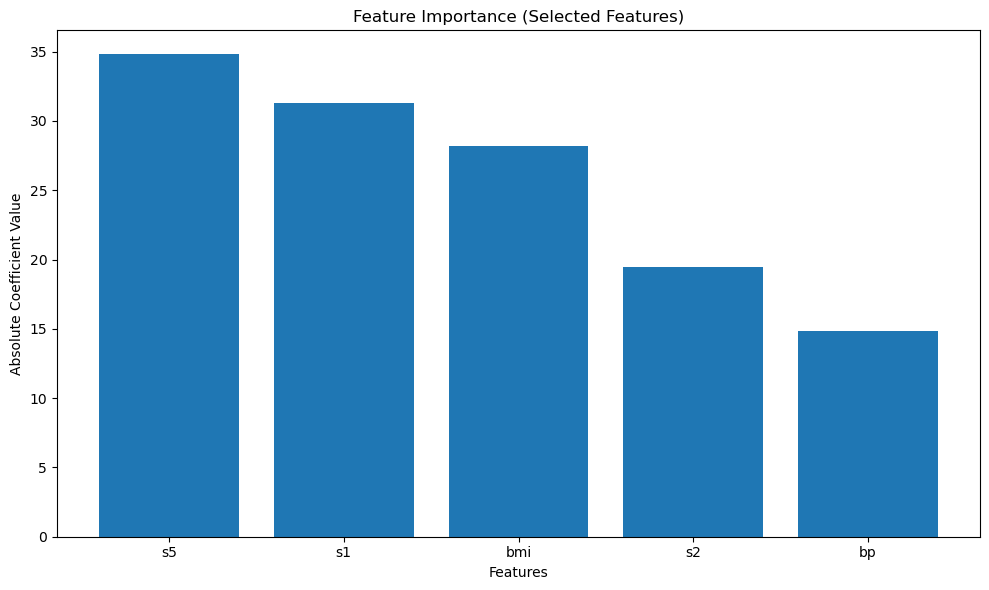

In [42]:
# Plot feature importance for selected features
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xlabel("Features")
plt.ylabel("Absolute Coefficient Value")
plt.title("Feature Importance (Selected Features)")
plt.tight_layout()
plt.show()

The bar chart shows the importance of the selected features based on their absolute coefficient values. BMI and Blood Pressure, recognized as risk factors for diabetes, are among the top 5 features, confirming their importance in predicting disease progression.


      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins  
      - s5      ltg, possibly log of serum triglycerides level


### Conclusions:

- Feature Selection: The RFE method pinpointed 5 essential features that preserve nearly the same predictive power as the original 10 features. This streamlines the model with minimal performance loss.
- The linear regression model, even after applying feature selection, accounts for approximately 44-45% of the variance in the target variable. This moderate performance indicates that:
a. Non-linear relationships might exist that the linear model fails to capture.
b. Important interactions between features might be overlooked.
c. External factors not included in the dataset could be influencing disease progression.
- Residuals Analysis: The residuals plot indicates no clear pattern, which is good. However, there is increased variance for higher predicted values, suggesting that the model’s performance may be inconsistent across the prediction range.